In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
mar_data=pd.read_csv(r"D:\Users\User\Downloads\archive (7)\Mall_Customers.csv")

In [3]:
mar_data.head(15)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
#Unsupervised Learning Techniques would be used 
#To classify/cluster Mall Customers based on numerical &  categorical features

EDA & PreProcessing

In [5]:
mar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
mar_data.shape

(200, 5)

In [7]:
info=pd.DataFrame(mar_data.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",mar_data.isna().sum(),True)
info.insert(2,"Duplicate",mar_data.duplicated().sum(),True)
info.insert(3,"unique",mar_data.nunique(),True)
info.insert(4,"IsNa",mar_data.min(),True)
info.insert(5,"max",mar_data.max(),True)
info.T

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
IsNull,0,0,0,0,0
IsNa,0,0,0,0,0
Duplicate,0,0,0,0,0
unique,200,2,51,64,84
IsNa,1,Female,18,15,1
max,200,Male,70,137,99


In [8]:
def diagnostic_plots(mar_data, variable,target):
    
    plt.figure(figsize=(20,7))
    
    plt.subplot(1,3,1)
    sns.histplot(mar_data[variable],kde=True,color='r')
    plt.title('Histogram')
    
    #scatterplot
    plt.subplot(1,3,2)
    plt.scatter(mar_data[variable],mar_data[target],color='g')
    plt.title('ScatterPlot')
    
    plt.subplot(1,3,3)
    sns.boxplot(y=mar_data[variable],color='b')
    plt.title('Boxplot')
    
    plt.show()

In [9]:
mar_data=mar_data.copy()

In [10]:
mar_data=mar_data.drop(['CustomerID'],axis=1)

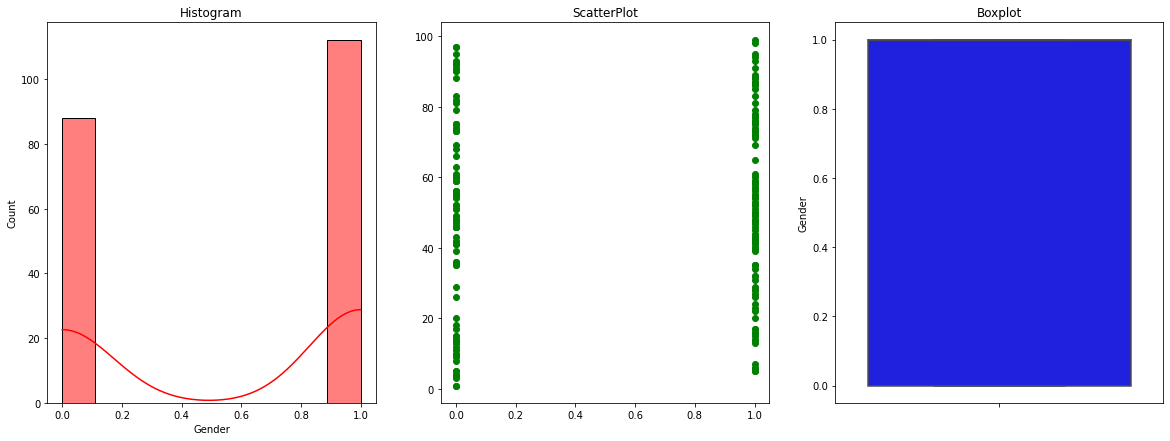

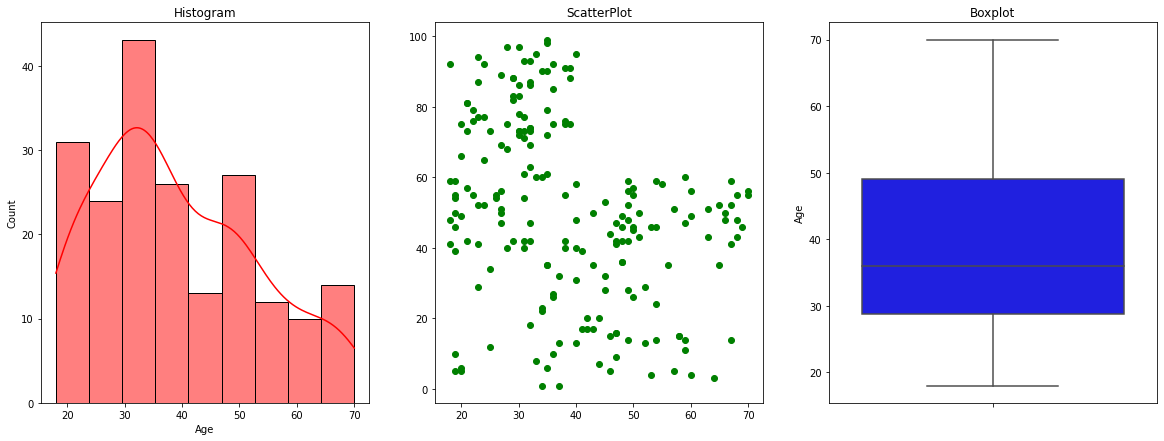

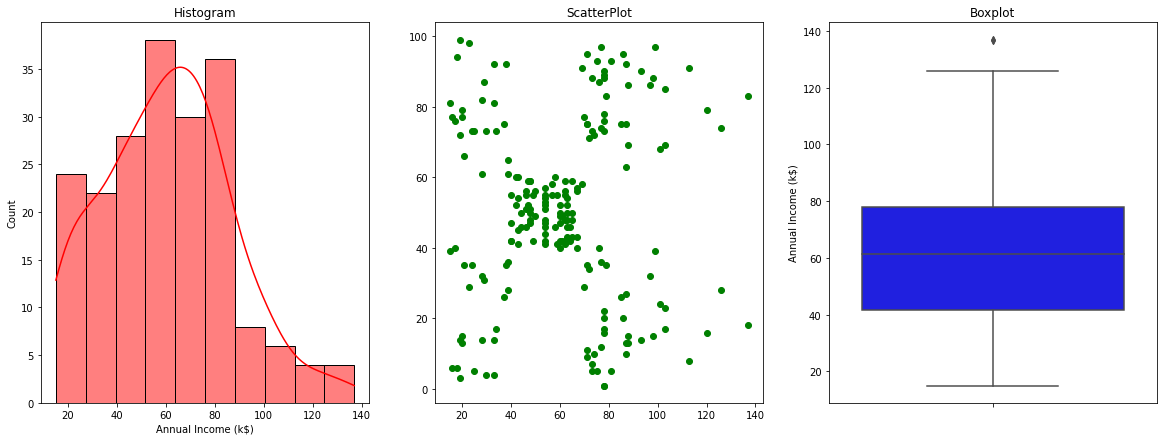

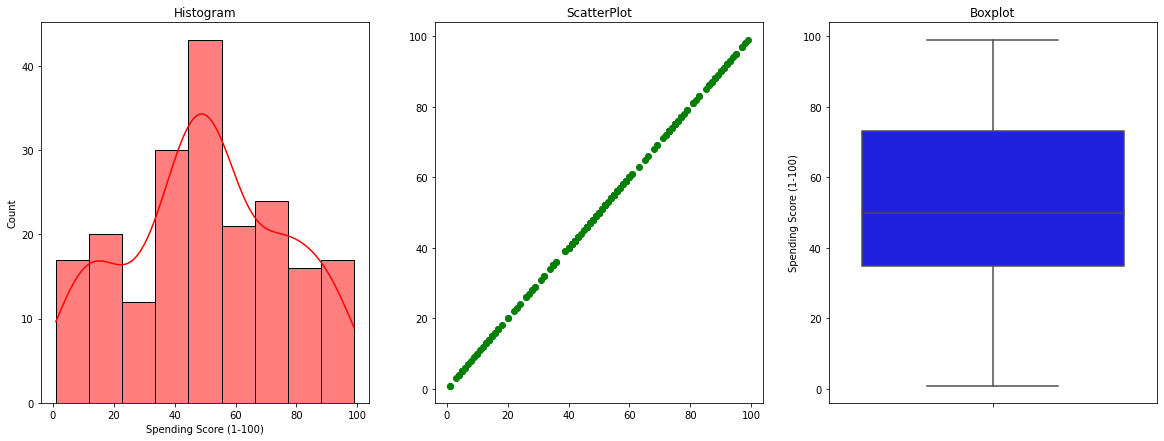

In [12]:
mar_data['Gender'].replace({"Male":0,"Female":1},inplace=True)

for col in mar_data:
    diagnostic_plots(mar_data,col,'Spending Score (1-100)')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

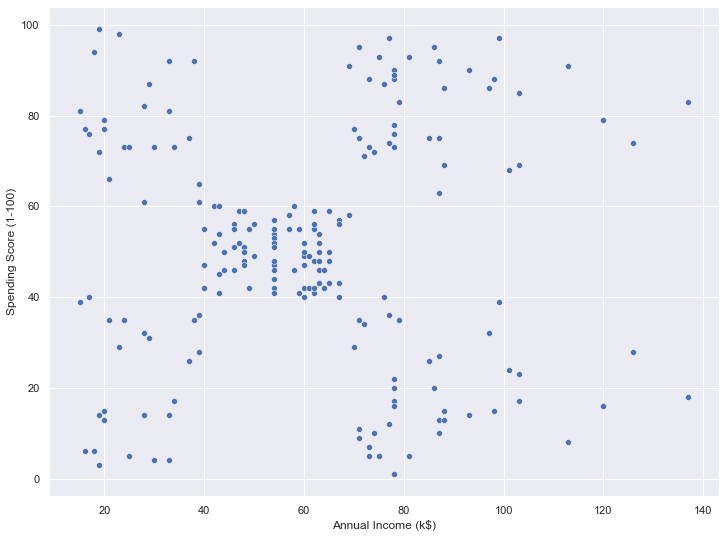

In [26]:
sns.scatterplot(x=mar_data['Annual Income (k$)'],y=mar_data['Spending Score (1-100)'])

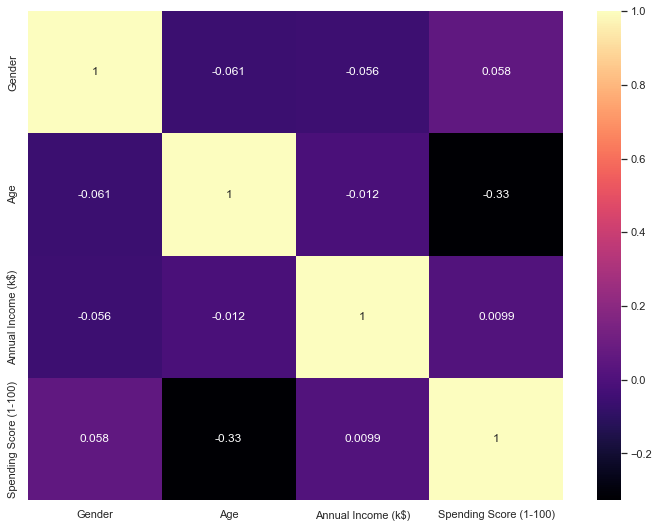

In [14]:
sns.set(rc={'figure.figsize':(12,9)})
dataplot=sns.heatmap(mar_data.corr(), cmap='magma',annot=True)

Model Building

Hierarchical clustering Technique:
Agglomerative & Divisive

In [16]:
from scipy.cluster.hierarchy  import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

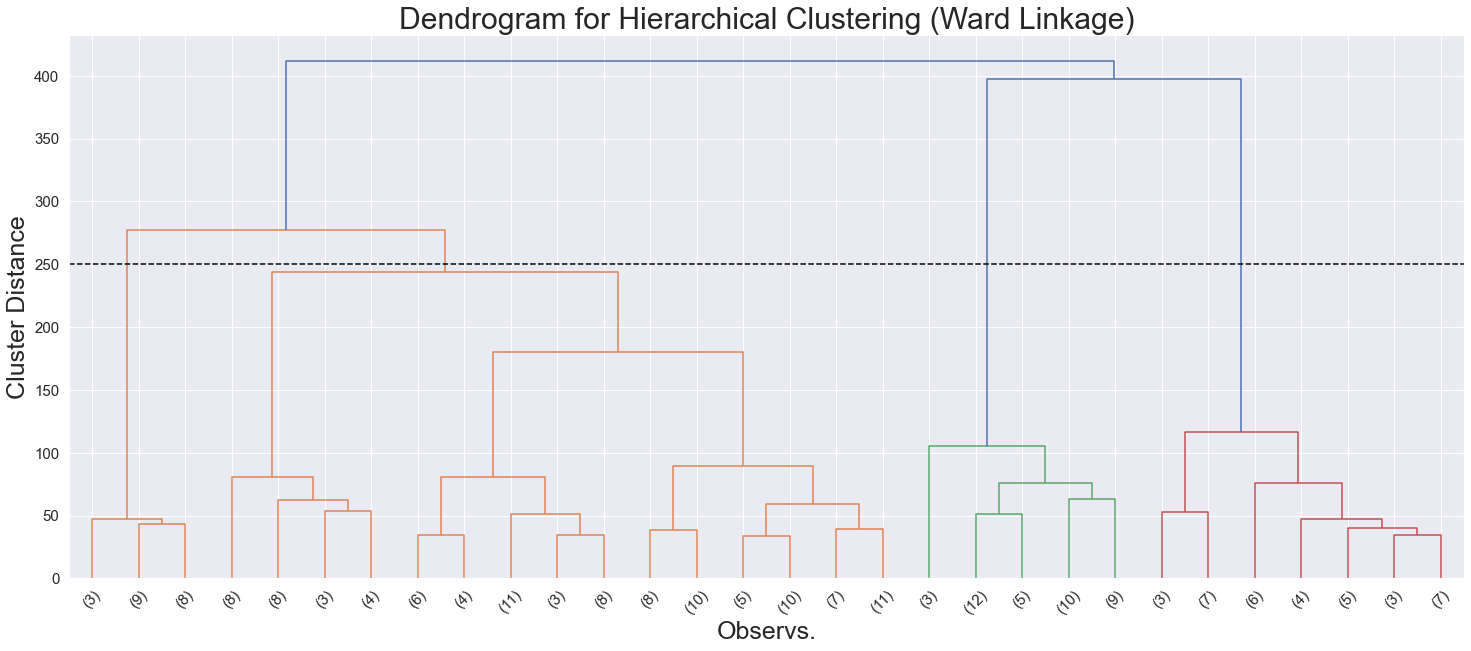

In [19]:
plt.figure(figsize=(25,10))
ax=plt.axes()
ax=dendrogram(linkage(mar_data, method='ward'),  truncate_mode='lastp', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering (Ward Linkage)',fontsize=30)
plt.axhline(y=250, color='Black', linestyle='--')

plt.xlabel('Observs.',fontsize=25)
plt.ylabel('Cluster Distance', fontsize=25)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [43]:
from sklearn.cluster import AgglomerativeClustering #bottoms up approach


hie_clus=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

In [21]:
list=[]
for k in range(1,11):
    hie_clus=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    hie_clus.fit(mar_data)
    list.append(hie_clus)

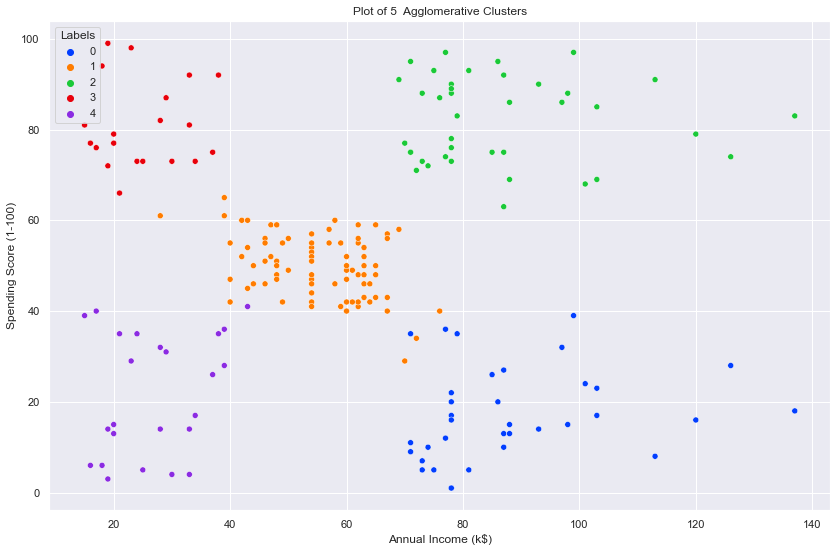

In [23]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

agglomerative_clusters=AgglomerativeClustering(n_clusters=5, linkage='average').fit(mar_data)

mar_data['Labels'] = agglomerative_clusters.labels_
plt.figure(figsize=(14, 9))
sns.scatterplot(data=mar_data,x=mar_data['Annual Income (k$)'],y= mar_data['Spending Score (1-100)'], hue=mar_data['Labels'], palette=sns.color_palette('bright', 5))
plt.title('Plot of 5  Agglomerative Clusters')
plt.show()

Findings of Hierarchical Clustering

In [45]:
#cluster label 0:- high annual income but low spending score
#cluster label 1:- mid-level annual income & mid-level spending score
#cluster label 2 :- high annual income &  high spending score
#cluster label 3:- low annual income & high spending score
#cluster label 4:- low annual income & low spending score

K-Means

In [40]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5)
kmeans.fit(mar_data[['Annual Income (k$)', 'Spending Score (1-100)']])
label=kmeans.labels_


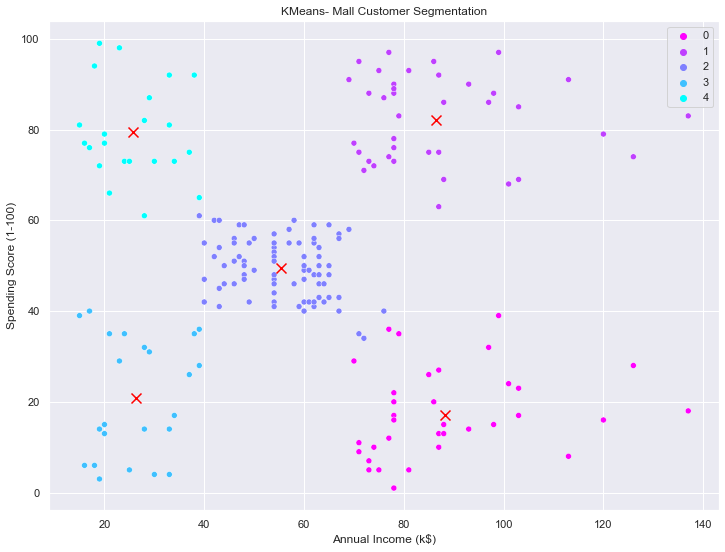

In [42]:
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('KMeans- Mall Customer Segmentation')

sns.scatterplot(x=mar_data['Annual Income (k$)'], y=mar_data['Spending Score (1-100)'],hue=label,palette='cool_r')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='x',color='red',s=100)

In [39]:
mar_data['Cluster']=kmeans.predict(mar_data[['Annual Income (k$)','Spending Score (1-100)']])
mar_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels,Cluster
0,0,19,15,39,4,5
1,0,21,15,81,3,2
2,1,20,16,6,4,5
3,1,23,16,77,3,2
4,1,31,17,40,4,5


Findings of KMeans is shown above